In [56]:
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings("ignore")

In [57]:
import os.path
def path_base(base_name):
    current_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
    print(current_dir)
    data_dir = current_dir.replace('notebook','data')
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [58]:
base = pd.read_csv(path_base('db_plano_saude2.csv'))

C:\MyPhyton\DataScience\notebook
C:\MyPhyton\DataScience\data
C:\MyPhyton\DataScience\data\db_plano_saude2.csv


In [59]:
base.head(3)

,idade,custo
0,18,470
1,23,520
2,28,630


In [36]:
base.shape

(10, 2)

In [37]:
X = base.iloc[:,0].values
print(X)

[18 23 28 33 38 43 48 53 58 63]


In [38]:
y = base.iloc[:,1].values
print(y)

[  470   520   630   830  1150  1530  2040  3080  5100 10100]


In [39]:
correlacao = np.corrcoef(X,y)

In [40]:
print(correlacao)

[[1.     0.8199]
 [0.8199 1.    ]]


In [41]:
X = X.reshape(-1,1)

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [43]:
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# b0
regressor.intercept_

-4081.7818181818175

In [45]:
# b1
regressor.coef_

array([163.6242])

# plotar

In [46]:
import matplotlib.pyplot as plt

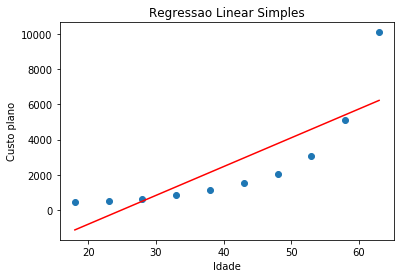

In [47]:
plt.scatter(X,y)
plt.title('Regressao Linear Simples')
plt.xlabel('Idade')
plt.ylabel('Custo plano')
plt.plot(X,regressor.predict(X),color='red')

In [48]:
print(regressor.predict(X))

[-1136.5455  -318.4242   499.697   1317.8182  2135.9394  2954.0606
  3772.1818  4590.303   5408.4242  6226.5455]


In [49]:
# 43
previsao1 = regressor.intercept_ + regressor.coef_ * 43
previsao1

array([2954.0606])

# Score

In [50]:
score = regressor.score(X,y)
score

0.6722701203412687

# Regressao Polinomial

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)

In [52]:
X_poly = poly.fit_transform(X)

In [53]:
regressor2 = LinearRegression()
regressor2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
score = regressor2.score(X_poly,y)
score

0.9976494147321994

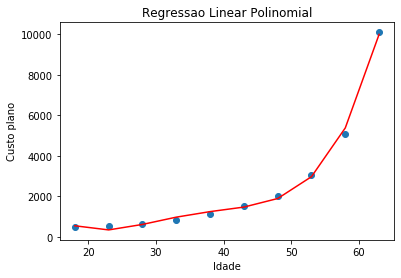

In [55]:
plt.scatter(X,y)
plt.title('Regressao Linear Polinomial')
plt.xlabel('Idade')
plt.ylabel('Custo plano')
plt.plot(X,regressor2.predict(poly.fit_transform(X)),color='red')